In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# EDA:

In [4]:
df = pd.read_csv('C:/Users/User/Proyecto Coder/data/processed/df_processed.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,Edad,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,27,No phone service,DSL,No,Yes,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,57,No,DSL,Yes,No,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,18,No,DSL,Yes,Yes,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,18,No phone service,DSL,Yes,No,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,24,No,Fiber optic,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,18,Yes,DSL,Yes,No,...,Yes,Yes,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,43,Yes,Fiber optic,No,Yes,...,Yes,Yes,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,25,No phone service,DSL,Yes,No,...,No,No,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,18,Yes,Fiber optic,No,No,...,No,No,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Veamos la disposicion de la variable churn:


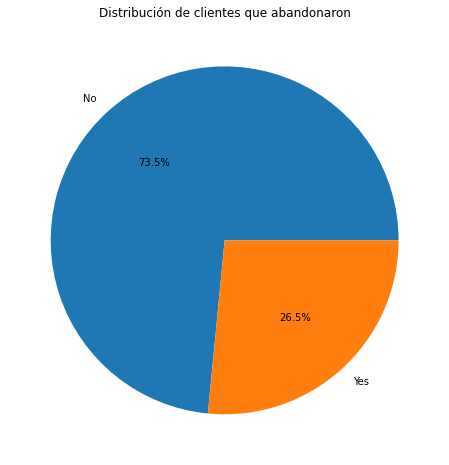

In [19]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize = (8,8), facecolor='white')
plt.pie(churn_counts, labels = churn_counts.index , autopct='%1.1f%%')
plt.title('Distribución de clientes que abandonaron')
plt.show()

#### 26% de los clientes se estan yendo :(
####

### Veamos ahora las disposicion de las demas variables categoricas junto la variable "jubilado" analizada en el discovery

In [10]:
# traemos las columnas
objects_columns = df.select_dtypes(include=['object']).columns
objects_columns = objects_columns.drop('customerID')
objects_columns = objects_columns.drop('Churn')
objects_columns

Index(['gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

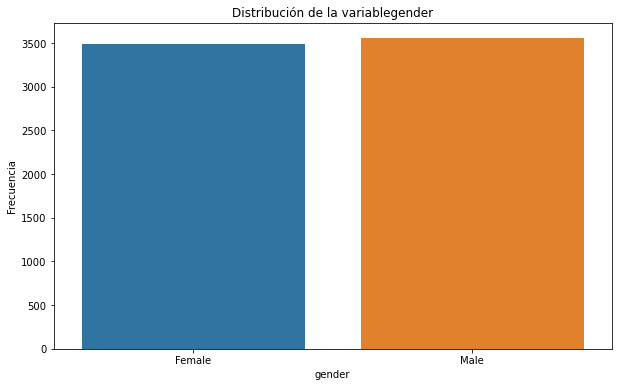

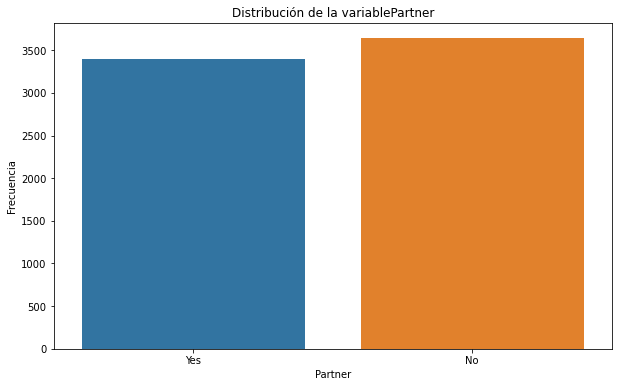

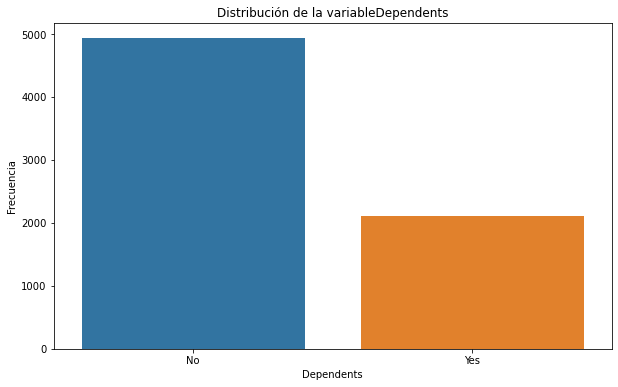

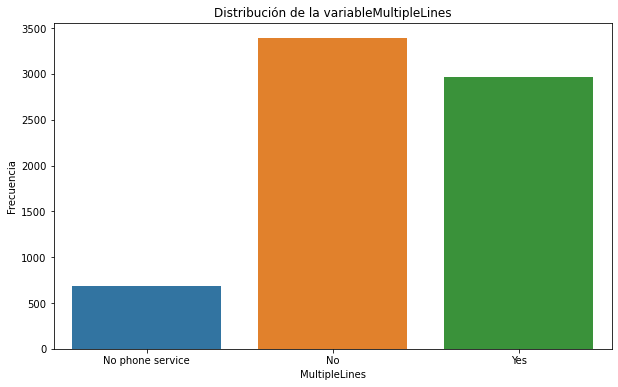

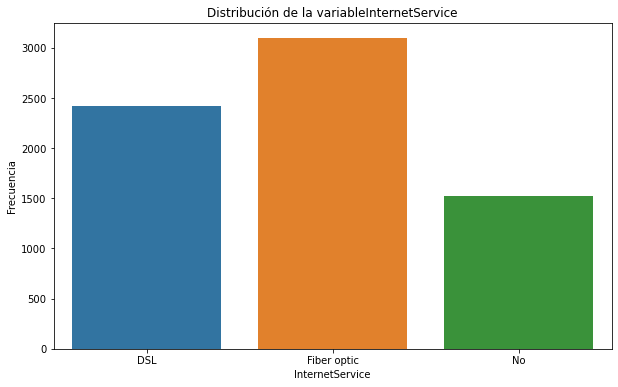

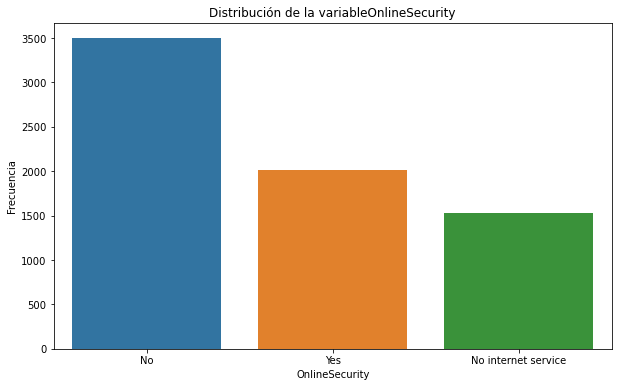

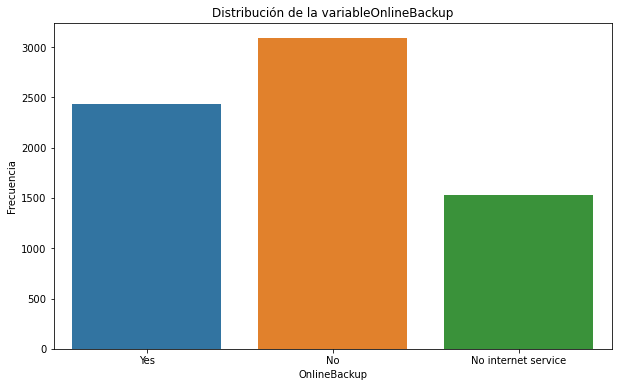

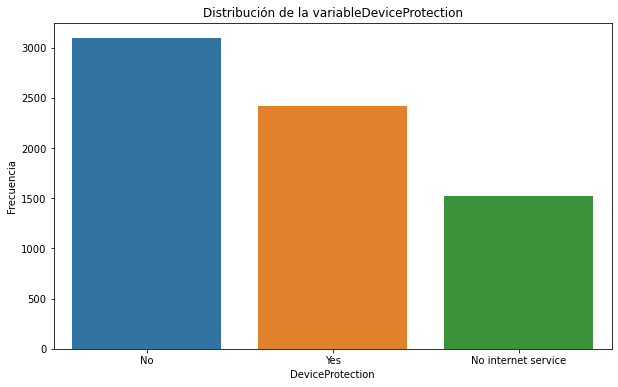

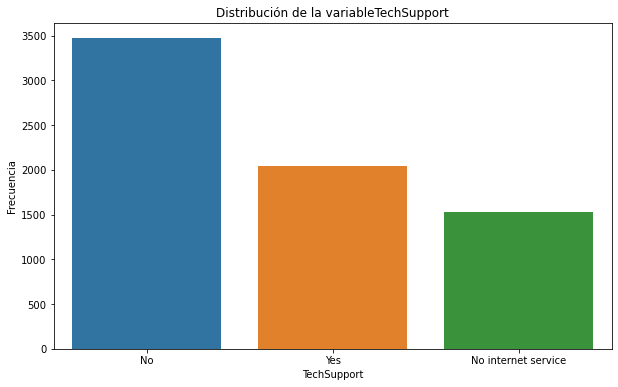

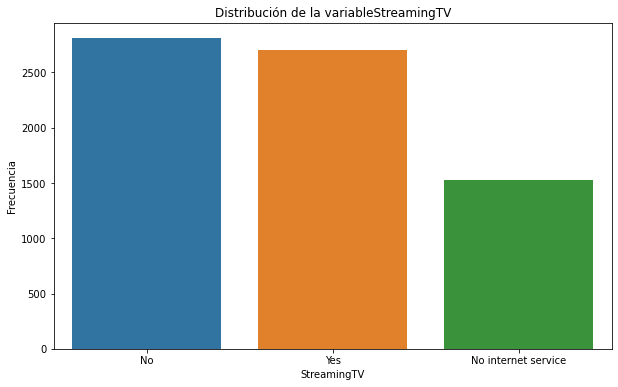

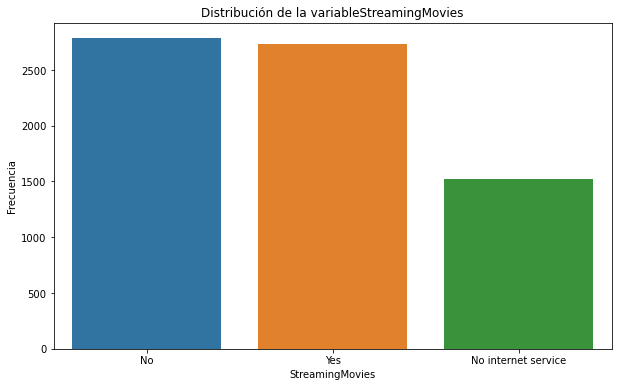

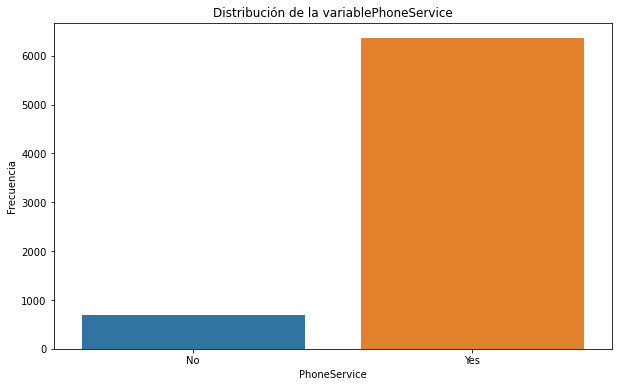

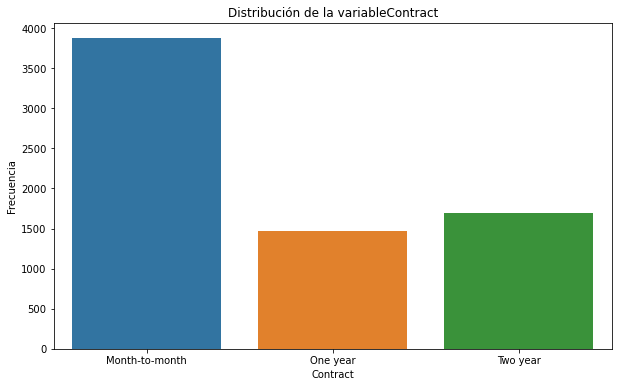

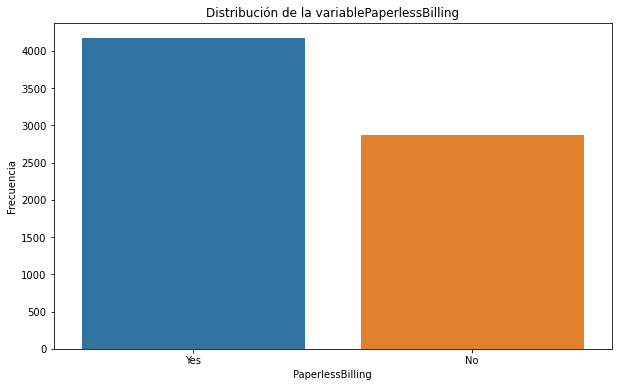

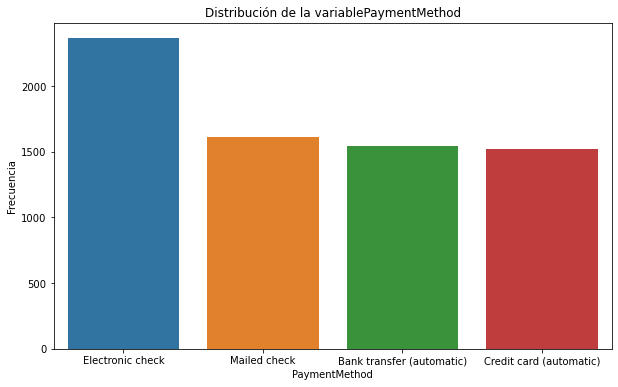

In [11]:
for column in objects_columns:
    plt.figure(figsize = (10,6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribución de la variable{column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()
    

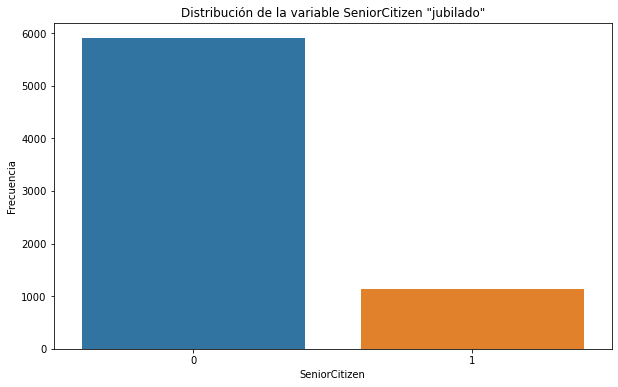

In [14]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x='SeniorCitizen')
plt.title(f'Distribución de la variable SeniorCitizen "jubilado"')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frecuencia')
plt.show()


### Describamos las variables cuantitativas:

In [15]:
df.describe()

,SeniorCitizen,Edad,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,33.476360,32.371149,64.761692,2279.798992
std,0.368612,12.868266,24.559481,30.090047,2266.730170
min,0.000000,18.000000,0.000000,18.250000,18.800000
25%,0.000000,22.000000,9.000000,35.500000,398.550000
50%,0.000000,32.000000,29.000000,70.350000,1394.550000
75%,0.000000,42.000000,55.000000,89.850000,3786.600000
max,1.000000,80.000000,72.000000,118.750000,8684.800000


### ¿como se comporta la cantidad de recargas mensuales o totales en la retencion de clientes?

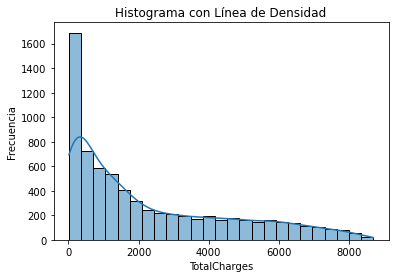

In [16]:
sns.histplot(data=df, x='TotalCharges', kde=True)
plt.title('Histograma con Línea de Densidad')
plt.xlabel('TotalCharges')
plt.ylabel('Frecuencia')
plt.show()

#### El 50% de los clientes invierte menos de 1500 aprox y el promedio de inversion es 2279. Hay una preferencia por los menores costos.
####

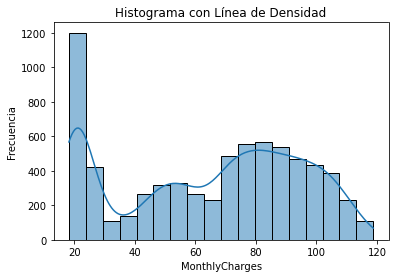

In [17]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)
plt.title('Histograma con Línea de Densidad')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

#### Se mantiene la preferencia anterior y se observa un gasto mas uniforme mensualmente.
####

### Analicemos la variable tenure (antiguedad) respecto a Churn

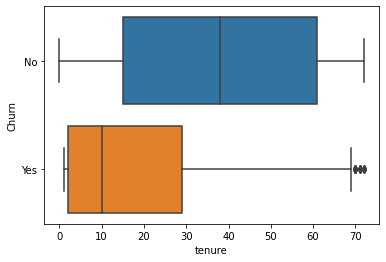

In [19]:
sns.boxplot(x='tenure', y='Churn', data=df)
plt.show()

#### De 1 a 30 años estan concentrados los clientes que más abandonan. Prodriamos enforcar el analisis en los clientes nuevos. Además, podemos decir que cuando la antigüedad del cliente es de alrededor de 40 años, existen máximas posibilidades de que ese cliente no se vaya.